## CLEANING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
#Read the data 
df=pd.read_csv('Apple-Twitter-Sentiment-DFE.csv', encoding='latin1')

In [3]:
df['sentiment'].value_counts(
)

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [ ]:
#check columns with missing vallues
df.isna().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [6]:
#drop columns with missing values
df.drop(columns=['_last_judgment_at', 'sentiment_gold'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   sentiment             3886 non-null   object 
 5   sentiment:confidence  3886 non-null   float64
 6   date                  3886 non-null   object 
 7   id                    3886 non-null   float64
 8   query                 3886 non-null   object 
 9   text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 277.2+ KB


In [8]:
# create a copy of the df
df_clean=df.copy()

In [9]:

def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove mentions
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove RT (retweet) indicator
        text = re.sub(r'^RT\s+', '', text)
        # Remove multiple spaces and strip
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        text=text.lower()
    return text

In [10]:
# Apply cleaning to the 'text' column
df_clean['text'] = df_clean['text'].apply(clean_text)

In [11]:
df.info

<bound method DataFrame.info of        _unit_id  _golden _unit_state  _trusted_judgments sentiment  \
0     623495513     True      golden                  10         3   
1     623495514     True      golden                  12         3   
2     623495515     True      golden                  10         3   
3     623495516     True      golden                  17         3   
4     623495517    False   finalized                   3         3   
...         ...      ...         ...                 ...       ...   
3881  623499442     True      golden                  13         3   
3882  623499450     True      golden                  16         3   
3883  623499486     True      golden                  14         5   
3884  623499514     True      golden                  13         1   
3885  623517290     True      golden                  17         5   

      sentiment:confidence                            date            id  \
0                   0.6264  Mon Dec 01 19:30:03 +00

In [12]:
# check the data type
print(df.dtypes)

_unit_id                  int64
_golden                    bool
_unit_state              object
_trusted_judgments        int64
sentiment                object
sentiment:confidence    float64
date                     object
id                      float64
query                    object
text                     object
dtype: object


In [13]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [_unit_id, _golden, _unit_state, _trusted_judgments, sentiment, sentiment:confidence, date, id, query, text]
Index: []


In [14]:
print("Before cleaning:")
print(df['text'].head())
print("\
After cleaning:")
print(df_clean['text'].head())

Before cleaning:
0    #AAPL:The 10 best Steve Jobs emails ever...htt...
1    RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2    My cat only chews @apple cords. Such an #Apple...
3    I agree with @jimcramer that the #IndividualIn...
4         Nobody expects the Spanish Inquisition #AAPL
Name: text, dtype: object
After cleaning:
0               :the 10 best steve jobs emails ever...
1    : why aapl stock had a mini-flash crash today ...
2                   my cat only chews cords. such an .
3    i agree with that the should own not trade , i...
4               nobody expects the spanish inquisition
Name: text, dtype: object


In [15]:
df_clean

,_unit_id,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,date,id,query,text
0,623495513,True,golden,10,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,:the 10 best steve jobs emails ever...
1,623495514,True,golden,12,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,: why aapl stock had a mini-flash crash today ...
2,623495515,True,golden,10,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,my cat only chews cords. such an .
3,623495516,True,golden,17,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,"i agree with that the should own not trade , i..."
4,623495517,False,finalized,3,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,nobody expects the spanish inquisition
...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,(via fc) apple is warming up to social media -...
3882,623499450,True,golden,16,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,: there is no avocado emoji may i ask why
3883,623499486,True,golden,14,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,i could not agree more. between and only great...
3884,623499514,True,golden,13,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,my iphone 5's photos are no longer downloading...


### Sentiment Distribution of Tweets

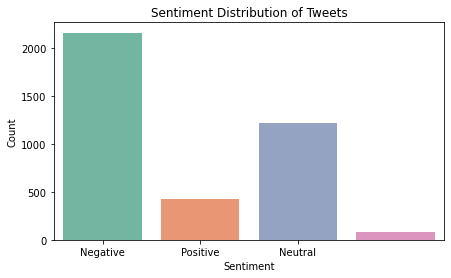

In [16]:
# Plotting the sentiment distribution (bar chart)
plt.figure(figsize=(7, 4))
sns.countplot(x='sentiment', data=df_clean, palette="Set2")

# Customizing the plot
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Negative', 'Positive', 'Neutral'])  # Adjust if you have Neutral class (2)
plt.show()



The negative sentiments have a higher count than the Neutral and Positive sentiments.

### Top 20 Words with Highest TF-IDF in Tweets About Apple

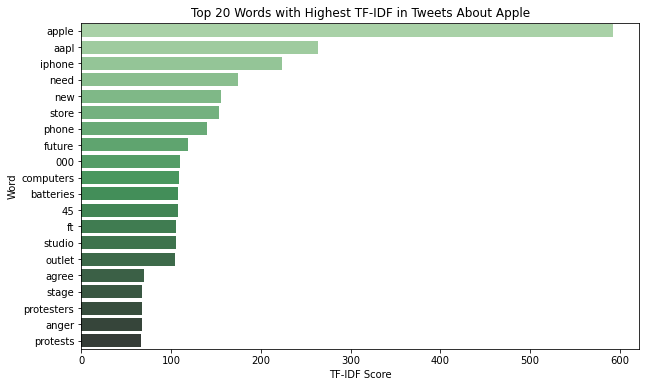

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Apply vectorizer to the text data
X = vectorizer.fit_transform(df_clean['text'])

# Get the TF-IDF values
tfidf_scores = X.sum(axis=0).A1
tfidf_features = vectorizer.get_feature_names() 

# Create a DataFrame to store words and their TF-IDF scores
tfidf_df = pd.DataFrame({'word': tfidf_features, 'tfidf': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='tfidf', ascending=False).head(20)

# Plot the top 20 words with the highest TF-IDF scores
plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf', y='word', data=tfidf_df, palette='Greens_d')
plt.title('Top 20 Words with Highest TF-IDF in Tweets About Apple')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()



The chart shows the most discussed topics, with higher bars indicating key focus areas like customer needs or product features, which can help prioritize user concerns.

### Word Cloud from Apple Twitter Sentiments

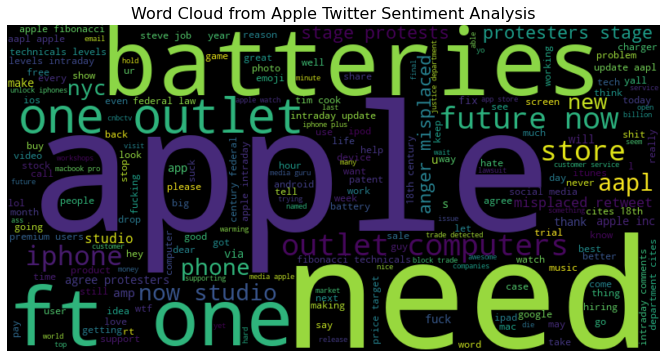

In [18]:
from wordcloud import WordCloud
# Combine all text data into a single string
all_text = " ".join(df_clean['text'])

# Create the WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=200
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Apple Twitter Sentiment Analysis', fontsize=16)
plt.show()


The word cloud highlights that discussions around Apple are dominated by concerns about batteries, customer needs, and store experiences, alongside interest in Apple's future technology. While there is enthusiasm for Apple's products, issues like batteries and customer frustration suggest areas where Apple could improve to enhance customer satisfaction